In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()

%matplotlib inline

In [2]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [3]:
updated_df = pd.read_csv("https://raw.githubusercontent.com/cdcepi/FluSight-forecast-hub/refs/heads/main/target-data/target-hospital-admissions.csv")

In [4]:
updated_df = updated_df[updated_df["location_name"] == "US"]
updated_df = updated_df[["date", "value"]]
updated_df["date"] = pd.to_datetime(updated_df["date"])
updated_df.set_index("date", inplace = True)
updated_df.sort_values(by = "date", inplace = True)
updated_df

,value
date,
2022-02-05,1092.0
2022-02-12,1164.0
2022-02-19,1493.0
2022-02-26,1603.0
2022-03-05,1791.0
...,...
2025-01-18,32561.0
2025-01-25,39927.0
2025-02-01,50272.0


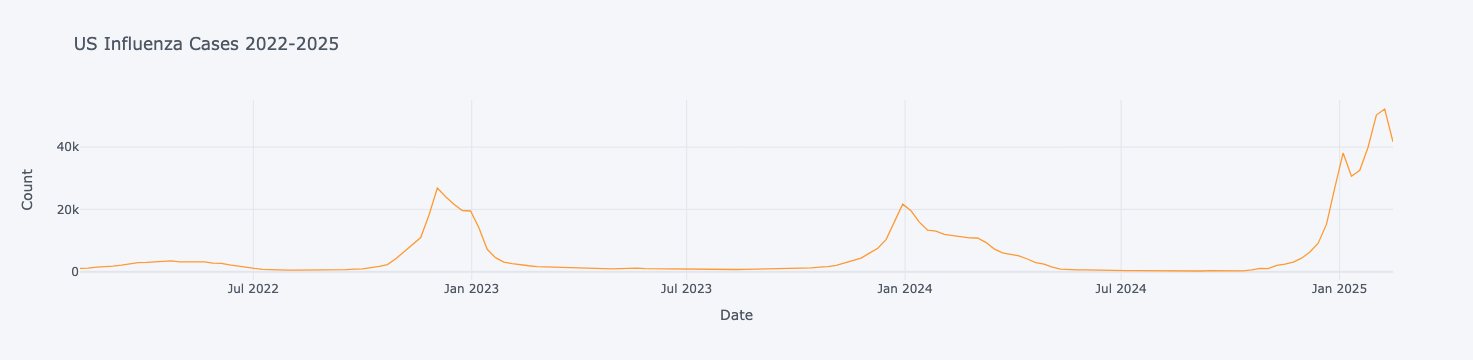

In [5]:
updated_df.iplot(xTitle = "Date", yTitle = "Count", title = "US Influenza Cases 2022-2025")

In [6]:
#Let's create an AutoLSTM model that is trained up to October 5, fix these parameters and create expanding window models
oct1stweekdf = updated_df.loc[:"2024-10-05"]
oct1stweekdf['ds'] = oct1stweekdf.index
oct1stweekdf["unique_id"] = "series_1"
oct1stweekdf = oct1stweekdf.rename(columns = {"value": "y"})
oct1stweekdf

,y,ds,unique_id
date,,,
2022-02-05,1092.0,2022-02-05,series_1
2022-02-12,1164.0,2022-02-12,series_1
2022-02-19,1493.0,2022-02-19,series_1
2022-02-26,1603.0,2022-02-26,series_1
2022-03-05,1791.0,2022-03-05,series_1
...,...,...,...
2024-09-07,223.0,2024-09-07,series_1
2024-09-14,319.0,2024-09-14,series_1
2024-09-21,293.0,2024-09-21,series_1


In [7]:
from neuralforecast.auto import AutoLSTM
from neuralforecast.tsdataset import TimeSeriesDataset

In [8]:
dataset, *_ = TimeSeriesDataset.from_df(oct1stweekdf)

In [9]:
type(dataset)

neuralforecast.tsdataset.TimeSeriesDataset

In [13]:
config = dict(input_size = np.array([-1, 10, 50]), random_seed = 101, inference_input_size = -1)
LSTMmodel = AutoLSTM(h = 4, backend = "optuna")
LSTMmodel.fit(dataset = dataset)

[I 2025-02-21 17:33:24,502] A new study created in memory with name: no-name-ae918a85-a170-4de9-99e0-585daa875ca6
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 19
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
-

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:33:33,179] Trial 0 finished with value: 64.40616607666016 and parameters: {'encoder_hidden_size': 300, 'encoder_n_layers': 2, 'context_size': 5, 'decoder_hidden_size': 128, 'learning_rate': 0.0029505872238786424, 'max_steps': 500, 'batch_size': 16, 'random_seed': 19, 'input_size': 16, 'inference_input_size': -4}. Best is trial 0 with value: 64.40616607666016.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 13
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
---------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:33:37,807] Trial 1 finished with value: 93.38375091552734 and parameters: {'encoder_hidden_size': 50, 'encoder_n_layers': 4, 'context_size': 5, 'decoder_hidden_size': 64, 'learning_rate': 0.0069428613457883336, 'max_steps': 500, 'batch_size': 32, 'random_seed': 13, 'input_size': 16, 'inference_input_size': -4}. Best is trial 0 with value: 64.40616607666016.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 17
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
-----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
[I 2025-02-21 17:33:48,286] Trial 2 finished with value: 669.4998168945312 and parameters: {'encoder_hidden_size': 200, 'encoder_n_layers': 2, 'context_size': 5, 'decoder_hidden_size': 128, 'learning_rate': 0.04666618558872044, 'max_steps': 1000, 'batch_size': 32, 'random_seed': 17, 'input_size': 64, 'inference_input_size': -4}. Best is trial 0 with value: 64.40616607666016.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:33:52,996] Trial 3 finished with value: 45.117286682128906 and parameters: {'encoder_hidden_size': 50, 'encoder_n_layers': 4, 'context_size': 10, 'decoder_hidden_size': 512, 'learning_rate': 0.0015323956353622784, 'max_steps': 500, 'batch_size': 16, 'random_seed': 3, 'input_size': -4, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
---------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:33:57,266] Trial 4 finished with value: 87.9611587524414 and parameters: {'encoder_hidden_size': 50, 'encoder_n_layers': 1, 'context_size': 5, 'decoder_hidden_size': 512, 'learning_rate': 0.0011954375270708652, 'max_steps': 500, 'batch_size': 16, 'random_seed': 3, 'input_size': 256, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 12
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:34:01,926] Trial 5 finished with value: 553.3916015625 and parameters: {'encoder_hidden_size': 100, 'encoder_n_layers': 3, 'context_size': 50, 'decoder_hidden_size': 512, 'learning_rate': 0.00036744539151383393, 'max_steps': 500, 'batch_size': 16, 'random_seed': 12, 'input_size': 64, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 10
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
---------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
[I 2025-02-21 17:34:10,417] Trial 6 finished with value: 127.5759048461914 and parameters: {'encoder_hidden_size': 50, 'encoder_n_layers': 1, 'context_size': 50, 'decoder_hidden_size': 512, 'learning_rate': 0.0640605833294689, 'max_steps': 1000, 'batch_size': 16, 'random_seed': 10, 'input_size': 64, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:34:18,577] Trial 7 finished with value: 1197.736083984375 and parameters: {'encoder_hidden_size': 200, 'encoder_n_layers': 4, 'context_size': 50, 'decoder_hidden_size': 512, 'learning_rate': 0.04890864366148701, 'max_steps': 500, 'batch_size': 16, 'random_seed': 1, 'input_size': -4, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
-----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:34:26,845] Trial 8 finished with value: 67.20951080322266 and parameters: {'encoder_hidden_size': 200, 'encoder_n_layers': 4, 'context_size': 50, 'decoder_hidden_size': 64, 'learning_rate': 0.0005478358581825324, 'max_steps': 500, 'batch_size': 32, 'random_seed': 3, 'input_size': -4, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/common/_base_auto.py:291: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[rank: 0] Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
[I 2025-02-21 17:34:31,204] Trial 9 finished with value: 531.953125 and parameters: {'encoder_hidden_size': 50, 'encoder_n_layers': 2, 'context_size': 5, 'decoder_hidden_size': 128, 'learning_rate': 0.056464698228775916, 'max_steps': 500, 'batch_size': 16, 'random_seed': 1, 'input_size': 16, 'inference_input_size': -4}. Best is trial 3 with value: 45.117286682128906.
[rank: 0] Seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 71.8 K | train
4 | context_adapter | Linear        | 2.0 K  | train
5 | mlp_decoder     | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.


AutoLSTM

In [14]:
#Best trial is trial 1 with parameters:

#{'encoder_hidden_size': 50, 'encoder_n_layers': 1, 'context_size': 10, 'decoder_hidden_size': 64, 'learning_rate': 0.016517696726627108, 
#'max_steps': 1000, 'batch_size': 32, 'random_seed': 14, 'input_size': 256, 'inference_input_size': -4}

#{'encoder_hidden_size': 50, 'encoder_n_layers': 4, 'context_size': 10, 'decoder_hidden_size': 512, 'learning_rate': 0.0015323956353622784, 
#'max_steps': 500, 'batch_size': 16, 'random_seed': 3, 'input_size': -4, 'inference_input_size': -4}

In [15]:
y_hat = LSTMmodel.predict(dataset = dataset)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [16]:
y_hat

array([[264.85864],
       [251.86218],
       [262.33752],
       [213.5299 ]], dtype=float32)

In [ ]:
#Setting up other dataframes to run normal LSTM with specified parameters
oct3rdweekdf = updated_df.loc[:"2024-10-19"]
nov1stweekdf = updated_df.loc[:"2024-11-02"]
nov3rdweekdf = updated_df.loc[:"2024-11-16"]
dec1stweekdf = updated_df.loc[:"2024-12-07"]

In [ ]:
#Adding in ds column to these dataframes
oct3rdweekdf["ds"] = oct3rdweekdf.index
nov1stweekdf["ds"] = nov1stweekdf.index
nov3rdweekdf["ds"] = nov3rdweekdf.index
dec1stweekdf["ds"] = dec1stweekdf.index

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM

In [ ]:
oct3rdweeknf = NeuralForecast(models=[LSTM(h=4, encoder_n_layers = 1, context_size = 10, decoder_hidden_size = 64, learning_rate = 0.016517696726627108, max_steps = 1000, batch_size = 32, random_seed = 14, input_size = 256, inference_input_size = -4)], freq = "W-SAT")
oct3rdweeknf.fit(df = oct3rdweekdf.assign(unique_id='series_1'), time_col="ds", target_col="value")

In [ ]:
LSTM_oct3rdweekfc = oct3rdweeknf.predict()
LSTM_oct3rdweekfc.set_index("ds", inplace = True)

In [ ]:
LSTM_oct3rdweekfc

In [ ]:
nov1stweeknf = NeuralForecast(models=[LSTM(h=4, encoder_n_layers = 1, context_size = 10, decoder_hidden_size = 64, learning_rate = 0.016517696726627108, max_steps = 1000, batch_size = 32, random_seed = 14, input_size = 256, inference_input_size = -4)], freq = "W-SAT")
nov1stweeknf.fit(df = nov1stweekdf.assign(unique_id='series_1'), time_col="ds", target_col="value")

In [ ]:
LSTM_nov1stweekfc = nov1stweeknf.predict()
LSTM_nov1stweekfc.set_index("ds", inplace = True)

In [ ]:
nov3rdweeknf = NeuralForecast(models=[LSTM(h=4, encoder_n_layers = 1, context_size = 10, decoder_hidden_size = 64, learning_rate = 0.016517696726627108, max_steps = 1000, batch_size = 32, random_seed = 14, input_size = 256, inference_input_size = -4)], freq = "W-SAT")
nov3rdweeknf.fit(df = nov3rdweekdf.assign(unique_id='series_1'), time_col="ds", target_col="value")

In [ ]:
LSTM_nov3rdweekfc = nov3rdweeknf.predict()
LSTM_nov3rdweekfc.set_index("ds", inplace = True)

In [ ]:
dec1stweeknf = NeuralForecast(models=[LSTM(h=4, encoder_n_layers = 1, context_size = 10, decoder_hidden_size = 64, learning_rate = 0.016517696726627108, max_steps = 1000, batch_size = 32, random_seed = 14, input_size = 256, inference_input_size = -4)], freq = "W-SAT")
dec1stweeknf.fit(df = dec1stweekdf.assign(unique_id='series_1'), time_col="ds", target_col="value")

In [ ]:
LSTM_dec1stweekfc = dec1stweeknf.predict()
LSTM_dec1stweekfc.set_index("ds", inplace = True)

In [ ]:
LSTM_oct1stweekfc = pd.DataFrame(y_hat.ravel(), index = pd.to_datetime(["2024-10-12", "2024-10-19", "2024-10-26", "2024-11-02"]))

In [ ]:
LSTM_oct1stweekfc

In [ ]:
LSTM_oct3rdweekfc

In [ ]:
LSTM_plottingdf = pd.DataFrame()
LSTM_plottingdf.index = updated_df.index
LSTM_plottingdf["Real Data"] = updated_df["value"]

LSTM_plottingdf["Oct 1st Week Model"] = LSTM_oct1stweekfc[0]
LSTM_plottingdf["Oct 3rd Week Model"] = LSTM_oct3rdweekfc["LSTM"]
LSTM_plottingdf["Nov 1st Week Model"] = LSTM_nov1stweekfc["LSTM"]
LSTM_plottingdf["Nov 3rd Week Model"] = LSTM_nov3rdweekfc["LSTM"]
LSTM_plottingdf["Dec 1st Week Model"] = LSTM_dec1stweekfc["LSTM"]

In [ ]:
LSTM_plottingdf.iplot(xTitle = "Date", yTitle = "Count", title = "Expanding Window with Fixed Parameters from AutoLSTM")

In [ ]:
LSTM_oct1stweekfc